## 普通にグラフを作成(Zシンドロームは下の重み付け)

/var/folders/z2/d7v_26mx7_s1sc2tvt5zxxmc0000gn/T/ipykernel_47765/3980735027.py:39: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(np.round(a[:-2],decimals= 4))


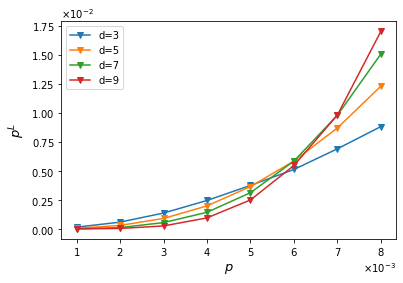

/var/folders/z2/d7v_26mx7_s1sc2tvt5zxxmc0000gn/T/ipykernel_47765/3980735027.py:60: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(np.round(a,decimals= 2))


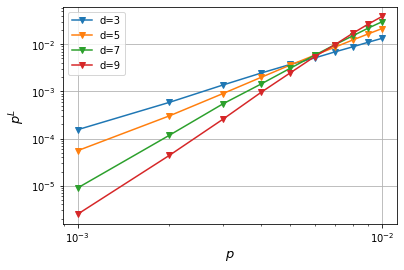

In [5]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import os
import matplotlib.ticker as ptick


################ 要変更 #################
# 追加のフォルダ名
folder = ""
# ファイル名
file = "Xerror,p=(0.001,0.01,0.001),d=(3,9,2),d(rep)=11,eta=1000,trials=2000000" + ".csv"
########################################

# FUjii-labのパス
path = "/Users/konohideki/Documents/Fujii-lab/surface(ideal)/circuit"

# csvファイルの読み込み
os.chdir(path+folder)
data = pd.read_csv(file, index_col=0)

# データフレームの行名(リスト)を取得
code_distance_list = data.index

# データフレームの列名(リスト)を取得
p_list = data.columns

##### グラフ作成 #####

fig, ax = plt.subplots()
for i in range(len(code_distance_list)):
    a = np.array(p_list)
    a = [float(num) for num in a]
    a = np.array(a)
    b = np.array(data.loc[code_distance_list[i]])
    ax.plot(a[:-2], b[:-2],marker='v',label="d="+str(code_distance_list[i]))
ax.set_xticklabels(np.round(a[:-2],decimals= 4))
ax.set_xticks(np.round(a[:-2],decimals= 4))
ax.set_xlabel(r"$p$", fontsize=13)
ax.set_ylabel(r"$p^{L}$", fontsize=13)
#ax.set_xlim(0,)
#ax.set_ylim(0,)
#ax.set_title("X,p=(0.0001,0.0009,0.0001),d=(3,9,2),d(rep)=5,eta=1000,trials=10000", fontsize=14)
ax.xaxis.set_major_formatter(ptick.ScalarFormatter(useMathText=True)) # x軸指数表記
ax.ticklabel_format(style="sci",  axis="x",scilimits=(0,0))
ax.yaxis.set_major_formatter(ptick.ScalarFormatter(useMathText=True)) 
ax.ticklabel_format(style="sci",  axis="y",scilimits=(0,0))
plt.legend()
plt.show()

fig, ax = plt.subplots()
for i in range(len(code_distance_list)):
    a = np.array(p_list)
    a = [float(num) for num in a]
    a = np.array(a)
    b = np.array(data.loc[code_distance_list[i]])
    ax.plot(a[0:], b[0:],marker='v',label="d="+str(code_distance_list[i]))
ax.set_xticklabels(np.round(a,decimals= 2))
ax.set_xticks(np.round(a,decimals= 2))
ax.set_xlabel(r"$p$", fontsize=13)
ax.set_ylabel(r"$p^{L}$", fontsize=13)
#ax.set_ylim(10**(-3))
#ax.set_xlim(10**(-10))
ax.xaxis.set_major_formatter(ptick.ScalarFormatter(useMathText=True)) # x軸指数表記
ax.ticklabel_format(style="sci",  axis="x",scilimits=(0,0))
ax.yaxis.set_major_formatter(ptick.ScalarFormatter(useMathText=True)) 
ax.ticklabel_format(style="sci",  axis="y",scilimits=(0,0))
ax.set_xscale("log")
ax.set_yscale("log")
ax.grid()
plt.legend()
plt.show()

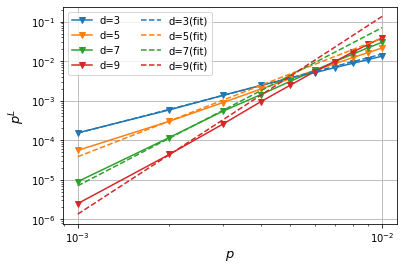

In [9]:
p_list = np.asarray(p_list, dtype=float)
cm = plt.get_cmap("tab10")
# 二乗誤差でフィット
f = 4
e_3_mean = np.mean(np.log10(np.array(data.loc[code_distance_list[0]])[:f])-2*np.log10(p_list)[:f])
e_5_mean = np.mean(np.log10(np.array(data.loc[code_distance_list[1]])[:f])-3*np.log10(p_list)[:f])
e_7_mean = np.mean(np.log10(np.array(data.loc[code_distance_list[2]])[:f])-4*np.log10(p_list)[:f])
e_9_mean = np.mean(np.log10(np.array(data.loc[code_distance_list[3]])[:f])-5*np.log10(p_list)[:f])

fig, ax = plt.subplots()
# 通常の曲線
ax.plot(p_list, np.array(data.loc[code_distance_list[0]]),marker='v',color=cm(0),label="d="+str(3))
ax.plot(p_list, np.array(data.loc[code_distance_list[1]]),marker='v',color=cm(1),label="d="+str(5))
ax.plot(p_list, np.array(data.loc[code_distance_list[2]]),marker='v',color=cm(2),label="d="+str(7))
ax.plot(p_list, np.array(data.loc[code_distance_list[3]]),marker='v',color=cm(3),label="d="+str(9))
# fit
ax.plot(p_list, 10**e_3_mean*p_list**2,marker='',color=cm(0),linestyle="dashed",label="d="+str(3)+"(fit)")
ax.plot(p_list, 10**e_5_mean*p_list**3,marker='',color=cm(1),linestyle="dashed",label="d="+str(5)+"(fit)")
ax.plot(p_list, 10**e_7_mean*p_list**4,marker='',color=cm(2),linestyle="dashed",label="d="+str(7)+"(fit)")
ax.plot(p_list, 10**e_9_mean*p_list**5,marker='',color=cm(3),linestyle="dashed",label="d="+str(9)+"(fit)")
ax.set_xlabel(r"$p$", fontsize=13)
ax.set_ylabel(r"$p^{L}$", fontsize=13)
ax.grid()
ax.set_xscale("log")
ax.set_yscale("log")
plt.legend(ncol = 2)
plt.show()

/var/folders/z2/d7v_26mx7_s1sc2tvt5zxxmc0000gn/T/ipykernel_47765/3184659802.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  axis[0].set_xticklabels(np.round(a[:-2],decimals= 4))
No handles with labels found to put in legend.


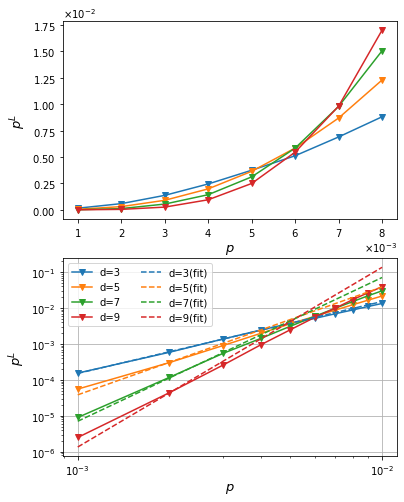

In [11]:
fig, axis = plt.subplots(2,1,figsize=(6, 8))
for i in range(len(code_distance_list)):
    a = np.array(p_list)
    a = [float(num) for num in a]
    a = np.array(a)
    b = np.array(data.loc[code_distance_list[i]])
    axis[0].plot(a[:-2], b[:-2],marker='v',label="d="+str(code_distance_list[i]))
axis[0].set_xticklabels(np.round(a[:-2],decimals= 4))
axis[0].set_xticks(np.round(a[:-2],decimals= 4))
axis[0].set_xlabel(r"$p$", fontsize=13)
axis[0].set_ylabel(r"$p^{L}$", fontsize=13)
#ax.set_xlim(0,)
#ax.set_ylim(0,)
#ax.set_title("X,p=(0.0001,0.0009,0.0001),d=(3,9,2),d(rep)=5,eta=1000,trials=10000", fontsize=14)
axis[0].xaxis.set_major_formatter(ptick.ScalarFormatter(useMathText=True)) # x軸指数表記
axis[0].ticklabel_format(style="sci",  axis="x",scilimits=(0,0))
axis[0].yaxis.set_major_formatter(ptick.ScalarFormatter(useMathText=True)) 
axis[0].ticklabel_format(style="sci",  axis="y",scilimits=(0,0))
plt.legend()

# 通常の曲線
axis[1].plot(p_list, np.array(data.loc[code_distance_list[0]]),marker='v',color=cm(0),label="d="+str(3))
axis[1].plot(p_list, np.array(data.loc[code_distance_list[1]]),marker='v',color=cm(1),label="d="+str(5))
axis[1].plot(p_list, np.array(data.loc[code_distance_list[2]]),marker='v',color=cm(2),label="d="+str(7))
axis[1].plot(p_list, np.array(data.loc[code_distance_list[3]]),marker='v',color=cm(3),label="d="+str(9))
# fit
axis[1].plot(p_list, 10**e_3_mean*p_list**2,marker='',color=cm(0),linestyle="dashed",label="d="+str(3)+"(fit)")
axis[1].plot(p_list, 10**e_5_mean*p_list**3,marker='',color=cm(1),linestyle="dashed",label="d="+str(5)+"(fit)")
axis[1].plot(p_list, 10**e_7_mean*p_list**4,marker='',color=cm(2),linestyle="dashed",label="d="+str(7)+"(fit)")
axis[1].plot(p_list, 10**e_9_mean*p_list**5,marker='',color=cm(3),linestyle="dashed",label="d="+str(9)+"(fit)")
axis[1].set_xlabel(r"$p$", fontsize=13)
axis[1].set_ylabel(r"$p^{L}$", fontsize=13)
axis[1].grid()
axis[1].set_xscale("log")
axis[1].set_yscale("log")

plt.legend(ncol=2)
plt.show()

/var/folders/z2/d7v_26mx7_s1sc2tvt5zxxmc0000gn/T/ipykernel_47765/1357359437.py:41: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(np.round(a,decimals= 2))


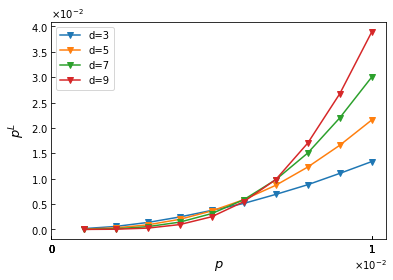

/var/folders/z2/d7v_26mx7_s1sc2tvt5zxxmc0000gn/T/ipykernel_47765/1357359437.py:65: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(np.round(a,decimals= 2))


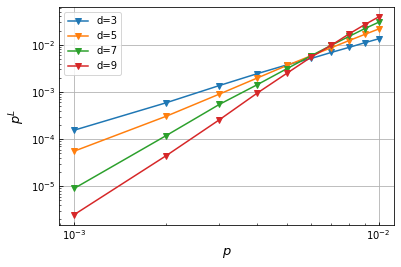

In [12]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import os
import matplotlib.ticker as ptick


################ 要変更 #################
# 追加のフォルダ名
folder = ""
# ファイル名
file = "Xerror,p=(0.001,0.01,0.001),d=(3,9,2),d(rep)=11,eta=1000,trials=2000000" + ".csv"
########################################

# FUjii-labのパス
path = "/Users/konohideki/Documents/Fujii-lab/surface(ideal)/circuit"

# csvファイルの読み込み
os.chdir(path+folder)
data = pd.read_csv(file, index_col=0)

# データフレームの行名(リスト)を取得
code_distance_list = data.index

# データフレームの列名(リスト)を取得
p_list = data.columns

##### グラフ作成 #####

plt.rcParams["xtick.direction"] = "in"     
plt.rcParams["ytick.direction"] = "in" 
fig, ax = plt.subplots()
for i in range(len(code_distance_list)):
    a = np.array(p_list)
    a = [float(num) for num in a]
    a = np.array(a)
    b = np.array(data.loc[code_distance_list[i]])
    ax.plot(a[0:], b[0:],marker='v',label="d="+str(code_distance_list[i]))
ax.set_xticklabels(np.round(a,decimals= 2))
ax.set_xticks(np.round(a,decimals= 2))
ax.set_xlabel(r"$p$", fontsize=13)
ax.set_ylabel(r"$p^{L}$", fontsize=13)
#ax.set_xlim(0,)
#ax.set_ylim(0,)
#ax.set_title("X,p=(0.0001,0.0009,0.0001),d=(3,9,2),d(rep)=5,eta=1000,trials=10000", fontsize=14)
ax.xaxis.set_major_formatter(ptick.ScalarFormatter(useMathText=True)) # x軸指数表記
ax.ticklabel_format(style="sci",  axis="x",scilimits=(0,0))
ax.yaxis.set_major_formatter(ptick.ScalarFormatter(useMathText=True)) 
ax.ticklabel_format(style="sci",  axis="y",scilimits=(0,0))
plt.legend()
plt.show()


plt.rcParams["xtick.direction"] = "in"     
plt.rcParams["ytick.direction"] = "in" 
fig, ax = plt.subplots()
for i in range(len(code_distance_list)):
    a = np.array(p_list)
    a = [float(num) for num in a]
    a = np.array(a)
    b = np.array(data.loc[code_distance_list[i]])
    ax.plot(a[0:], b[0:],marker='v',label="d="+str(code_distance_list[i]))
ax.set_xticklabels(np.round(a,decimals= 2))
ax.set_xticks(np.round(a,decimals= 2))
ax.set_xlabel(r"$p$", fontsize=13)
ax.set_ylabel(r"$p^{L}$", fontsize=13)
#ax.set_ylim(10**(-3))
#ax.set_xlim(10**(-10))
ax.xaxis.set_major_formatter(ptick.ScalarFormatter(useMathText=True)) # x軸指数表記
ax.ticklabel_format(style="sci",  axis="x",scilimits=(0,0))
ax.yaxis.set_major_formatter(ptick.ScalarFormatter(useMathText=True)) 
ax.ticklabel_format(style="sci",  axis="y",scilimits=(0,0))
ax.set_xscale("log")
ax.set_yscale("log")
ax.grid()
plt.legend()
plt.show()